# Análisis de la Encuesta Multiproposito

## Importación de Paquetes y carga del archivo

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
data = pd.read_excel('Encuesta_Multiproposito_Suba.xlsx')

In [3]:
data.shape

(24536, 498)

**Hay en total 24536 encuestados en la Localidad de Suba**

# Octava Sección (NPCIP)

## NPCIP1
### 1. ¿Con qué frecuencia utiliza ...computador de escritorio, portátil o tableta (en cualquier lugar)?
1. Todos los días de la semana
2. Al menos una vez a la semana, pero no cada día
3. Al menos una vez al mes, pero no cada semana
4. Al menos una vez al año, pero no cada mes
5. No utiliza computador de escritorio, portátil o tableta

**Datos: 23515**

In [4]:
data['NPCIP1'].count()

23515

In [5]:
data['NPCIP1'].value_counts()

1.0    13767
5.0     6696
2.0     2418
3.0      504
4.0      130
Name: NPCIP1, dtype: int64

In [6]:
data['NPCIP1'] = data['NPCIP1'].replace([1,2,3,4,5],['Todos los días de la semana',
'Al menos una vez a la semana, pero no cada día',
'Al menos una vez al mes, pero no cada semana',
'Al menos una vez al año, pero no cada mes',
'No utiliza computador de escritorio, portátil o tableta'])

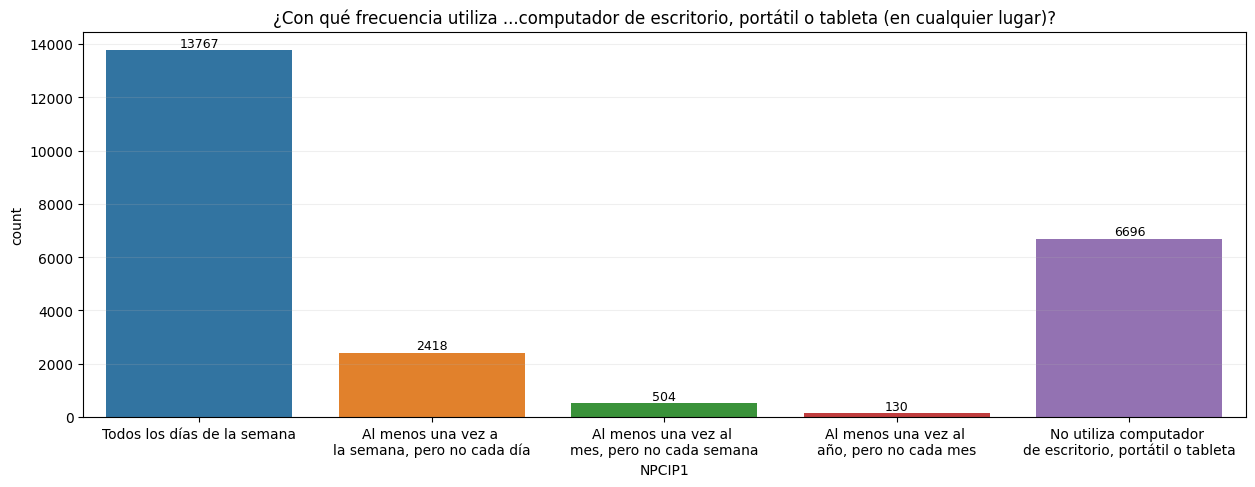

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
g = sns.countplot(ax=ax, data = data, x ='NPCIP1')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('¿Con qué frecuencia utiliza ...computador de escritorio, portátil o tableta (en cualquier lugar)?')
ax.set_xticklabels(['Todos los días de la semana',
'Al menos una vez a \nla semana, pero no cada día',
'Al menos una vez al \nmes, pero no cada semana',
'Al menos una vez al \naño, pero no cada mes',
'No utiliza computador \nde escritorio, portátil o tableta'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()


## NPCIP2{A-G}
### 2. ¿En cuáles de los siguientes sitios usa ...computador?
1. En la vivienda que habita
2. En el trabajo
3. En el establecimiento educativo
4. En un café internet o cabina
5. Donde un pariente o amigo
6. En un aula comunitaria digital
7. En otro sitio

**Datos: 16819**

In [7]:
disc = [i for i in data.columns if 'NPCIP2' in str(i)]
disc.remove('NPCIP2DA')
print(disc)

['NPCIP2A', 'NPCIP2B', 'NPCIP2C', 'NPCIP2D', 'NPCIP2E', 'NPCIP2F', 'NPCIP2G']


In [8]:
for i in disc:
    print(i, data[i].count())

NPCIP2A 16819
NPCIP2B 16819
NPCIP2C 16819
NPCIP2D 16819
NPCIP2E 16819
NPCIP2F 16819
NPCIP2G 16819


In [9]:
for i in disc:
    data = data.replace({i:2},0)

In [10]:
for i in disc:
    data[i] = data[i].replace([0,1], ["No","Si"])

In [11]:
list_disc = ['En la vivienda que habita',
'En el trabajo',
'En el establecimiento educativo',
'En un café internet o cabina',
'Donde un pariente o amigo',
'En un aula comunitaria digital',
'En otro sitio']


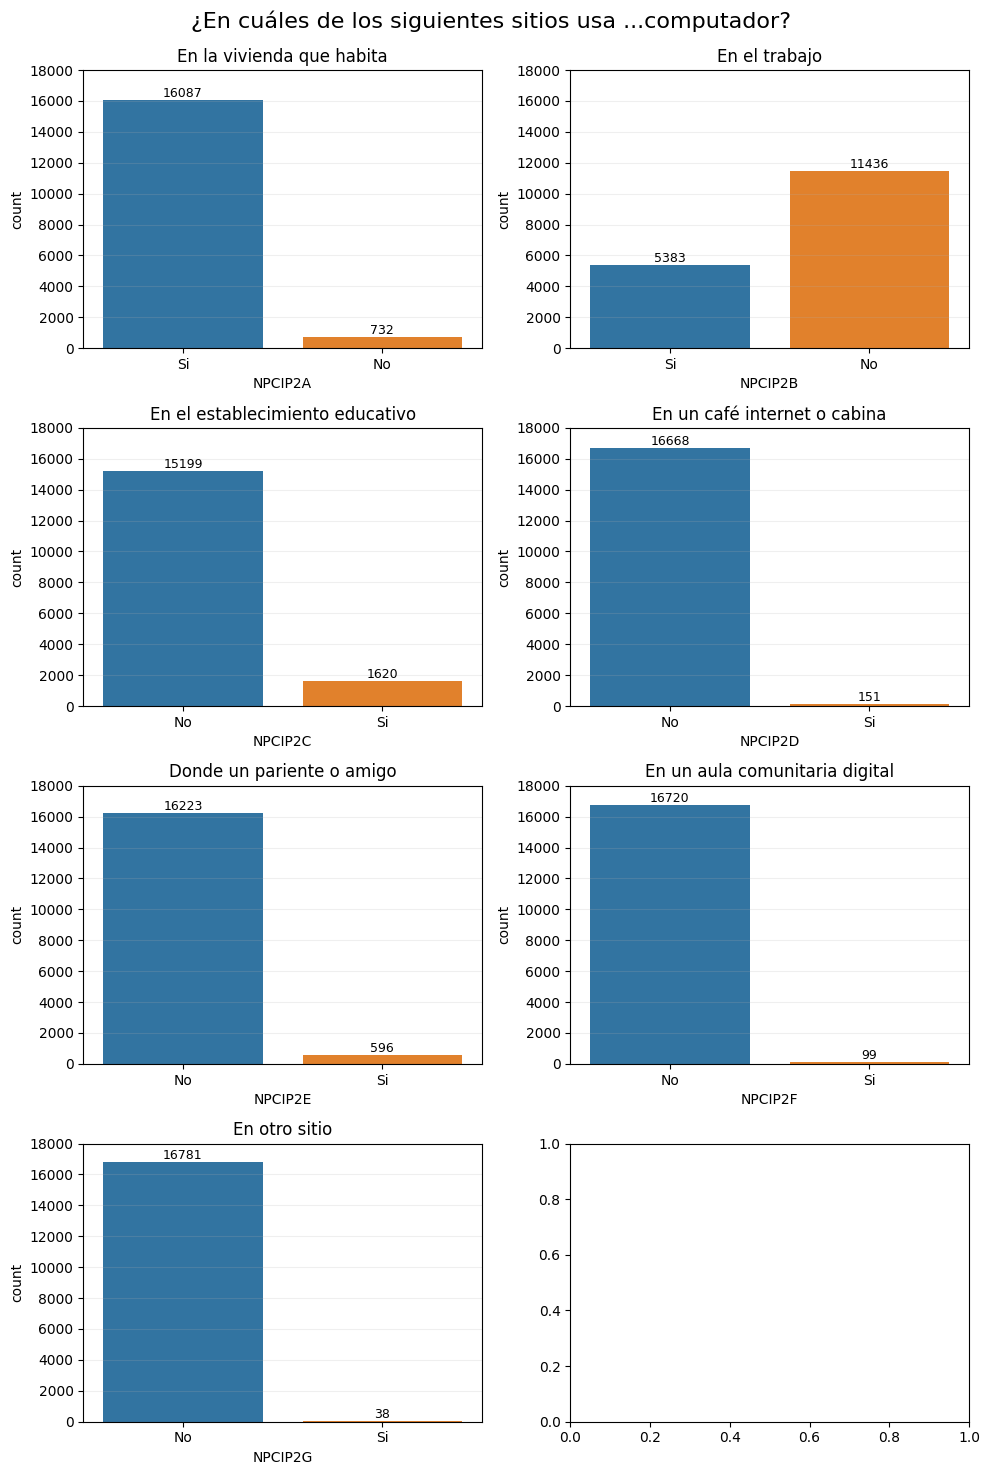

In [12]:
fig, axes = plt.subplots(4,2, figsize = (10,15), squeeze=False)
axli = axes.flatten()
fig.subplots_adjust(top=0.9)
fig.suptitle('¿En cuáles de los siguientes sitios usa ...computador? ', fontsize= 16)
for ax,cols,names in zip(axli,disc,list_disc):
    sns.countplot(x = cols, data = data, ax = ax)
    ax.grid(alpha = 0.2, axis = 'y')
    ax.set_title(f'{names}')
    #ax.set_xticks([0,1],['No','Si'])
    ax.set_ylim(0,18000)
    ax.margins(y=0.1) # make room for the labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.0f', fontsize=9)
plt.tight_layout() 
plt.subplots_adjust(top=0.94)
plt.show()

## NPCIP2DA
### 2Da. En un café internet o cabina ¿Cuánto pago el mes pasado?

**Datos: 151**

In [15]:
data['NPCIP2DA'].count()

151

In [16]:
data['NPCIP2DA'].describe()

count       151.000000
mean      11988.741722
std       18166.777528
min           0.000000
25%        2000.000000
50%        5000.000000
75%       15000.000000
max      100000.000000
Name: NPCIP2DA, dtype: float64

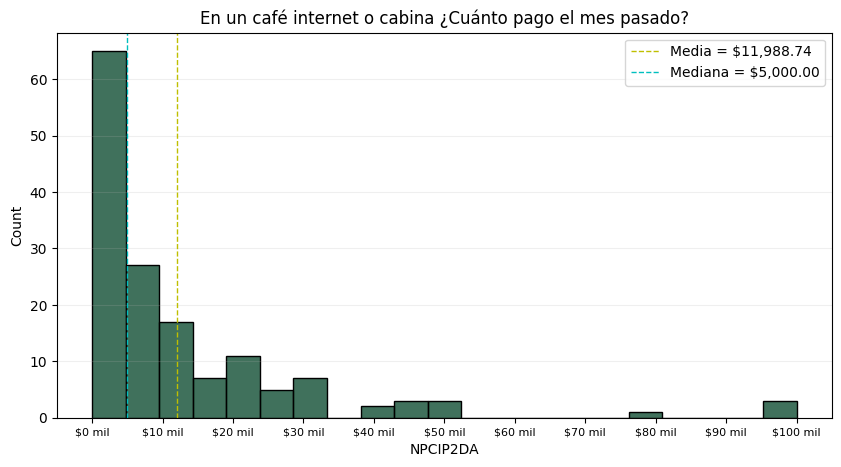

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(data = data, x = 'NPCIP2DA', color = '#004225')
plt.title('En un café internet o cabina ¿Cuánto pago el mes pasado?')
plt.grid(alpha = 0.2, axis = 'y')
plt.axvline(data['NPCIP2DA'].mean(), color='y', linestyle='dashed', linewidth=1, label = f'Media = ${data["NPCIP2DA"].mean():,.2f}')
plt.axvline(data['NPCIP2DA'].median(), color='c', linestyle='dashed', linewidth=1, label = f'Mediana = ${data["NPCIP2DA"].median():,.2f}')
plt.xticks(range(0,110000,10000),[f'${(i / 1000):.0f} mil' for i in range(0,110000,10000)], fontsize=8)
plt.legend()
plt.show()

## NPCIP3
### 3. ¿Para qué utiliza ...principalmente computador?
1. Para trabajar
2. Para estudiar
3. Para entretenimiento
4. Otro

**Datos: 16819**

In [18]:
data['NPCIP3'].count()

16819

In [19]:
data['NPCIP3'].value_counts()

1.0    8782
2.0    4539
3.0    3030
4.0     468
Name: NPCIP3, dtype: int64

In [13]:
data['NPCIP3'] = data['NPCIP3'].replace([1,2,3,4],['Para trabajar',
'Para estudiar',
'Para entretenimiento',
'Otro'])

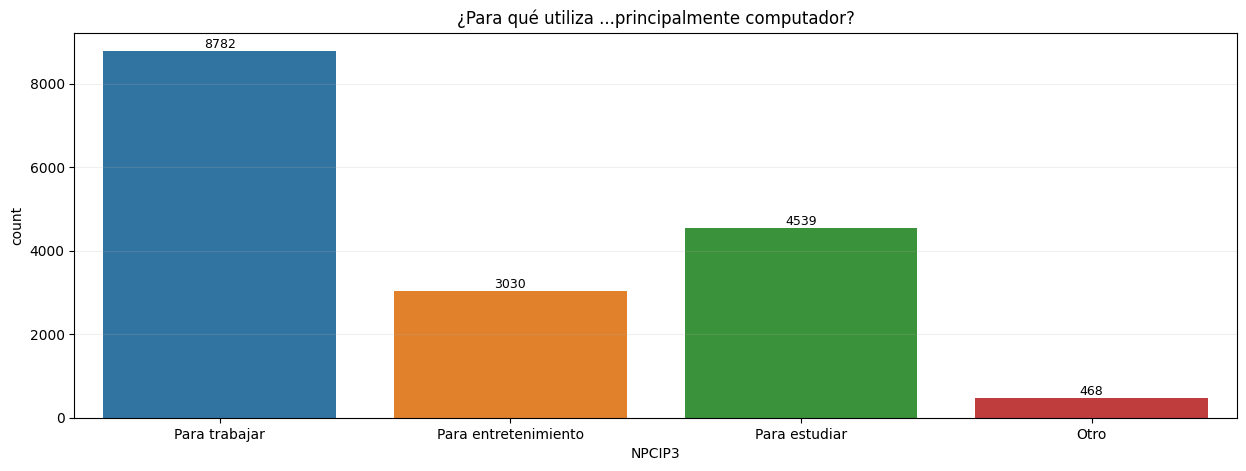

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
g = sns.countplot(ax=ax, data = data, x ='NPCIP3')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('¿Para qué utiliza ...principalmente computador?')
#ax.set_xticklabels(['Para trabajar',
#'Para estudiar',
#'Para entretenimiento',
#'Otro'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()


## NPCIP4
### 4. ¿Con qué frecuencia utiliza ...internet (en cualquier lugar y desde cualquier dispositivo)?
1. Todos los días de la semana
2. Al menos una vez a la semana, pero no cada día
3. Al menos una vez al mes, pero no cada semana
4. Al menos una vez al año, pero no cada mes
5. No utiliza Internet

**Datos: 23515**


In [21]:
data['NPCIP4'].count()

23515

In [22]:
data['NPCIP4'].value_counts()

1.0    18793
5.0     2577
2.0     1860
3.0      237
4.0       48
Name: NPCIP4, dtype: int64

In [15]:
data['NPCIP4'] = data['NPCIP4'].replace([1, 2, 3, 4, 5], ['Todos los días de la semana',
'Al menos una vez a la semana, pero no cada día',
'Al menos una vez al mes, pero no cada semana',
'Al menos una vez al año, pero no cada mes',
'No utiliza Internet'])

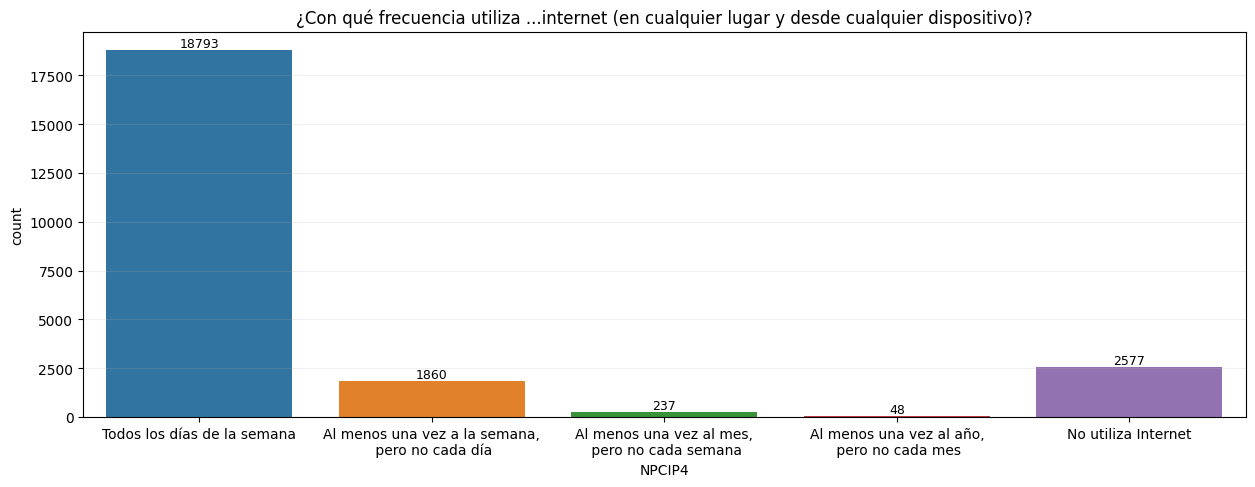

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
g = sns.countplot(ax=ax, data = data, x ='NPCIP4')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('¿Con qué frecuencia utiliza ...internet (en cualquier lugar y desde cualquier dispositivo)?')
ax.set_xticklabels(['Todos los días de la semana',
'Al menos una vez a la semana,\n pero no cada día',
'Al menos una vez al mes,\n pero no cada semana',
'Al menos una vez al año,\n pero no cada mes',
'No utiliza Internet'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()


## NPCIP5
## 5. ¿Por qué motivo principal ...no usa internet?
1. Porque no lo conoce o no sabe usarlo
2. Por falta de interés o porque no lo necesita
3. Por costos
4. Por problemas de conexión (acceso)
5. Por restricción de los padres o adultos
6. No lo considera seguro
7. Otro motivo

**Datos: 2577**


In [24]:
data['NPCIP5'].count()

2577

In [25]:
data['NPCIP5'].value_counts()

1.0    1287
2.0     525
3.0     338
5.0     166
7.0     149
6.0      76
4.0      36
Name: NPCIP5, dtype: int64

In [16]:
data['NPCIP5'] = data['NPCIP5'].replace([1,2,3,4,5,6,7],['Porque no lo conoce o no sabe usarlo',
'Por falta de interés o porque no lo necesita',
'Por costos',
'Por problemas de conexión (acceso)',
'Por restricción de los padres o adultos',
'No lo considera seguro',
'Otro motivo'] )

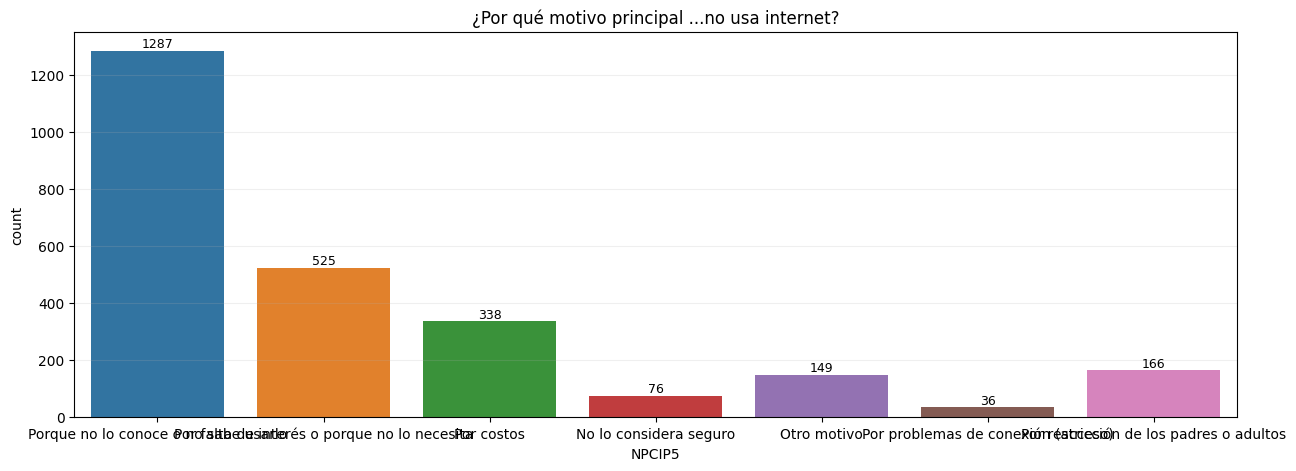

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
g = sns.countplot(ax=ax, data = data, x ='NPCIP5')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('¿Por qué motivo principal ...no usa internet?')
#ax.set_xticklabels(['Porque no lo conoce\n o no sabe usarlo',
#'Por falta de interés\n o porque no lo necesita',
#'Por costos',
#'Por problemas de\n conexión (acceso)',
#'Por restricción de\n los padres o adultos',
#'No lo considera seguro',
#'Otro motivo'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()


## NPCIP6{A-H} 
### 6. ¿Cuáles de los siguientes dispositivos utiliza … para acceder a internet:
1. Computador de escritorio?
2. Computador portatil
3. Tableta
4. Teléfono celular
5. Consola para juegos electrónicos
6. Televisor inteligente
7. Reproductores digítales de música, video e imagen
8. Otro

**Datos: 20398**

In [19]:
disc = [i for i in data.columns if 'NPCIP6' in str(i)]
#disc.remove('NPCIP2DA')
print(disc)

['NPCIP6A', 'NPCIP6B', 'NPCIP6C', 'NPCIP6D', 'NPCIP6E', 'NPCIP6F', 'NPCIP6G', 'NPCIP6H']


In [20]:
for i in disc:
    print(i, data[i].count())

NPCIP6A 20938
NPCIP6B 20938
NPCIP6C 20938
NPCIP6D 20938
NPCIP6E 20938
NPCIP6F 20938
NPCIP6G 20938
NPCIP6H 20938


In [21]:
for i in disc:
    data = data.replace({i:2},0)

In [22]:
for i in disc:
    data[i] = data[i].replace([0,1], ["No","Si"])

In [23]:
list_disc = ['Computador de escritorio',
'Computador portatil',
'Tableta',
'Teléfono celular',
'Consola para juegos electrónicos',
'Televisor inteligente',
'Reproductores digítales de música, video e imagen',
'Otro']


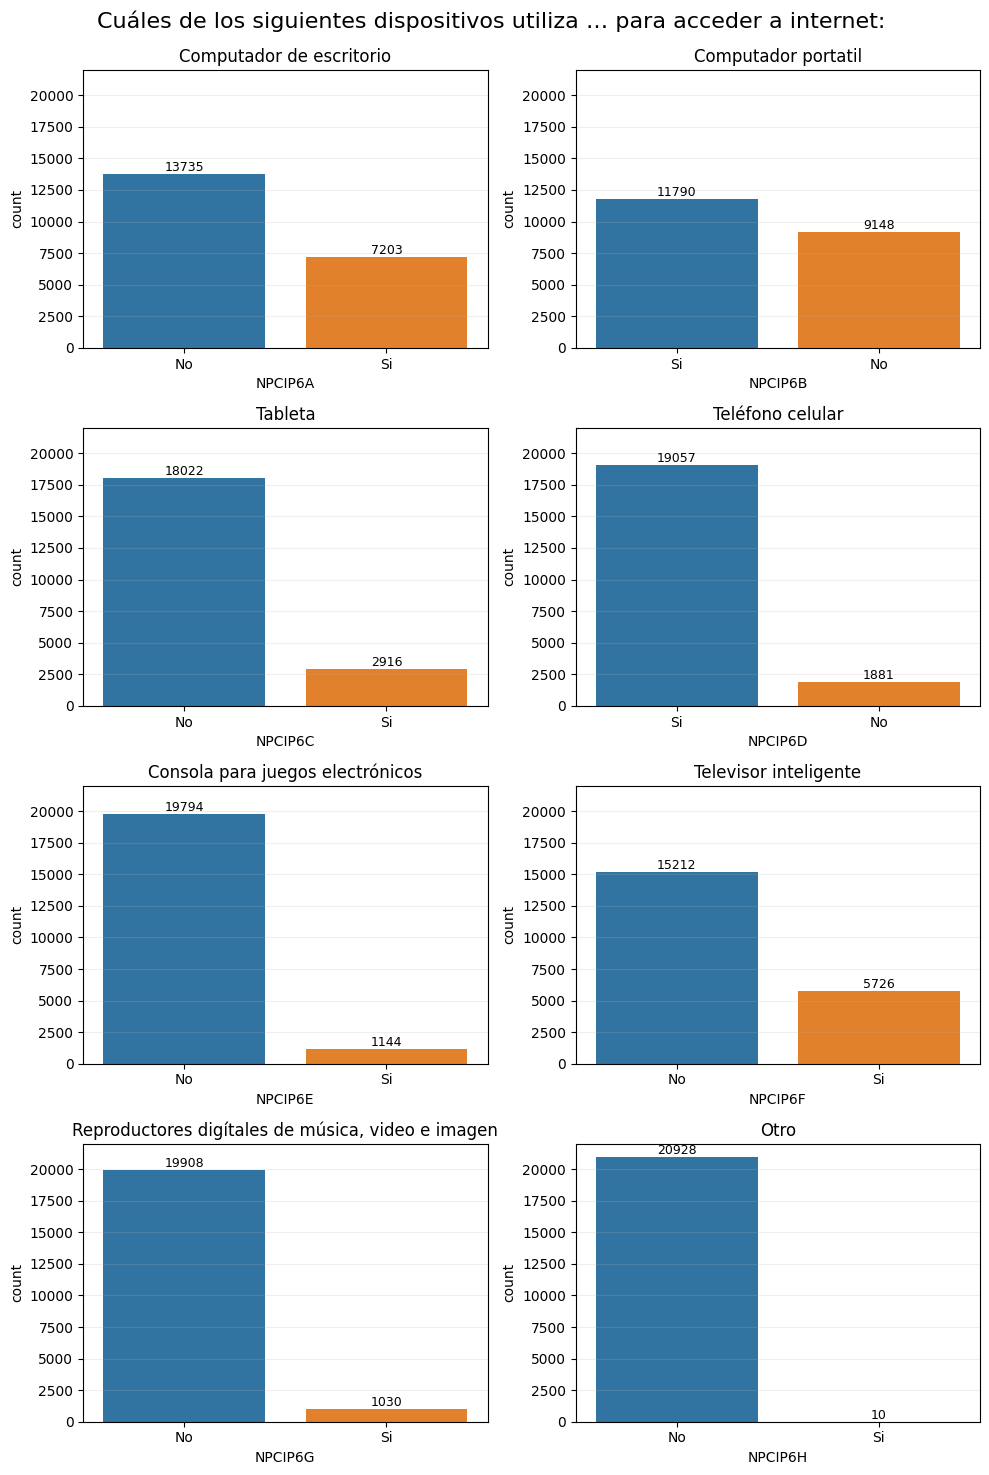

In [27]:
fig, axes = plt.subplots(4,2, figsize = (10,15), squeeze=False)
axli = axes.flatten()
fig.subplots_adjust(top=0.9)
fig.suptitle('Cuáles de los siguientes dispositivos utiliza … para acceder a internet: ', fontsize= 16)
for ax,cols,names in zip(axli,disc,list_disc):
    sns.countplot(x = cols, data = data, ax = ax)
    ax.grid(alpha = 0.2, axis = 'y')
    ax.set_title(f'{names}')
    #ax.set_xticks([0,1],['No','Si'])
    ax.set_ylim(0,22000)
    ax.margins(y=0.1) # make room for the labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.0f', fontsize=9)
plt.tight_layout() 
plt.subplots_adjust(top=0.94)
plt.show()

## NPCIP7{A-H}
### 7. ¿En cuáles de los siguientes sitios accede … a internet?:
1. En la vivienda que habita
2. En el trabajo
3. En la institución educativa
4. En centros de acceso público gratis
5. En centros de acceso público con costo 
6. En la vivienda de otra persona (pariente, amigo/a, vecino/a)
7. En desplazamiento de un sitio a otro
8. Otro sitio

**Datos: 20398**


In [28]:
disc = [i for i in data.columns if 'NPCIP7' in str(i)]
#disc.remove('NPCIP2DA')
print(disc)

['NPCIP7A', 'NPCIP7B', 'NPCIP7C', 'NPCIP7D', 'NPCIP7E', 'NPCIP7F', 'NPCIP7G', 'NPCIP7H']


In [29]:
for i in disc:
    print(i, data[i].count())

NPCIP7A 20938
NPCIP7B 20938
NPCIP7C 20938
NPCIP7D 20938
NPCIP7E 20938
NPCIP7F 20938
NPCIP7G 20938
NPCIP7H 20938


In [30]:
for i in disc:
    data = data.replace({i:2},0)

In [31]:
for i in disc:
    data[i] = data[i].replace([0,1],["No","Si"])

In [32]:
list_disc = ['En la vivienda que habita',
'En el trabajo',
'En la institución educativa',
'En centros de acceso público gratis',
'En centros de acceso público con costo',
'En la vivienda de otra persona (pariente, amigo/a, vecino/a)',
'En desplazamiento de un sitio a otro',
'Otro sitio']


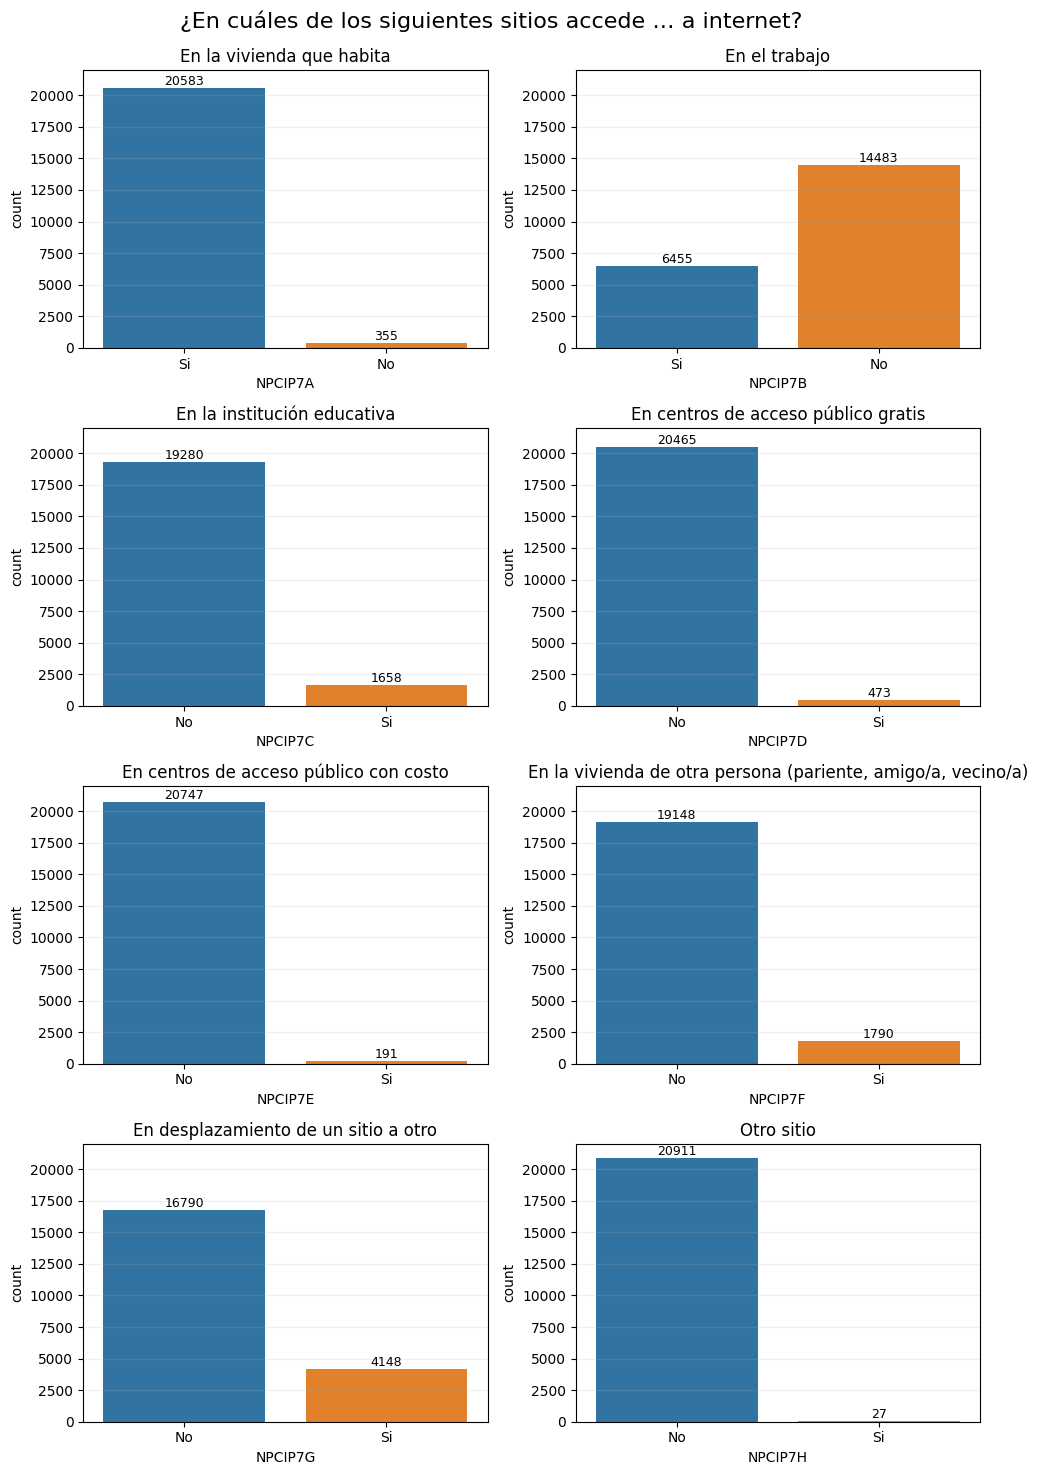

In [33]:
fig, axes = plt.subplots(4,2, figsize = (10,15), squeeze=False)
axli = axes.flatten()
fig.subplots_adjust(top=0.9)
fig.suptitle('¿En cuáles de los siguientes sitios accede … a internet? ', fontsize= 16)
for ax,cols,names in zip(axli,disc,list_disc):
    sns.countplot(x = cols, data = data, ax = ax)
    ax.grid(alpha = 0.2, axis = 'y')
    ax.set_title(f'{names}')
    #ax.set_xticks([0,1],['No','Si'])
    ax.set_ylim(0,22000)
    ax.margins(y=0.1) # make room for the labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.0f', fontsize=9)
plt.tight_layout() 
plt.subplots_adjust(top=0.94)
plt.show()

## NPCIP8{A-J}
## 8. Para cuáles de los siguientes servicios o actividades utiliza … internet:

1. Obtener información (excluir la búsqueda de información con fines de educación y aprendizaje)
2. Correo y mensajería
3. Redes sociales
4. Comprar/ordenar productos o servicios
5. Banca electrónica y otros servicios financieros
6. Educación y aprendizaje
7. Trámites con organismos gubernamentales
8. Actividades de entretenimiento (juegos, bajar música, etc.)
9. Consulta de medios de comunicación (televisión, radio, periódicos, revistas, medios digitales, etc.)
10. Trabajar
11. Otro

**Datos: 20398**

In [34]:
disc = [i for i in data.columns if 'NPCIP8' in str(i)]
#disc.remove('NPCIP2DA')
print(disc)

['NPCIP8A', 'NPCIP8B', 'NPCIP8C', 'NPCIP8D', 'NPCIP8E', 'NPCIP8F', 'NPCIP8G', 'NPCIP8H', 'NPCIP8I', 'NPCIP8K', 'NPCIP8J', 'NPCIP8DE']


In [35]:
for i in disc:
    print(i, data[i].count())

NPCIP8A 20938
NPCIP8B 20938
NPCIP8C 20938
NPCIP8D 20938
NPCIP8E 20938
NPCIP8F 20938
NPCIP8G 20938
NPCIP8H 20938
NPCIP8I 20938
NPCIP8K 20938
NPCIP8J 20938
NPCIP8DE 8835


In [36]:
for i in disc:
    data = data.replace({i:2},0)

In [37]:
for i in disc:
    data[i] = data[i].replace([0,1],["No","Si"])

In [38]:
list_disc = ['Obtener información (excluir la búsqueda de información con fines de educación y aprendizaje)',
'Correo y mensajería',
'Redes sociales',
'Comprar/ordenar productos o servicios',
'Banca electrónica y otros servicios financieros',
'Educación y aprendizaje',
'Trámites con organismos gubernamentales',
'Actividades de entretenimiento (juegos, bajar música, etc.)',
'Consulta de medios de comunicación (televisión, radio, periódicos, revistas, medios digitales, etc.)',
'Trabajar',
'Otro']


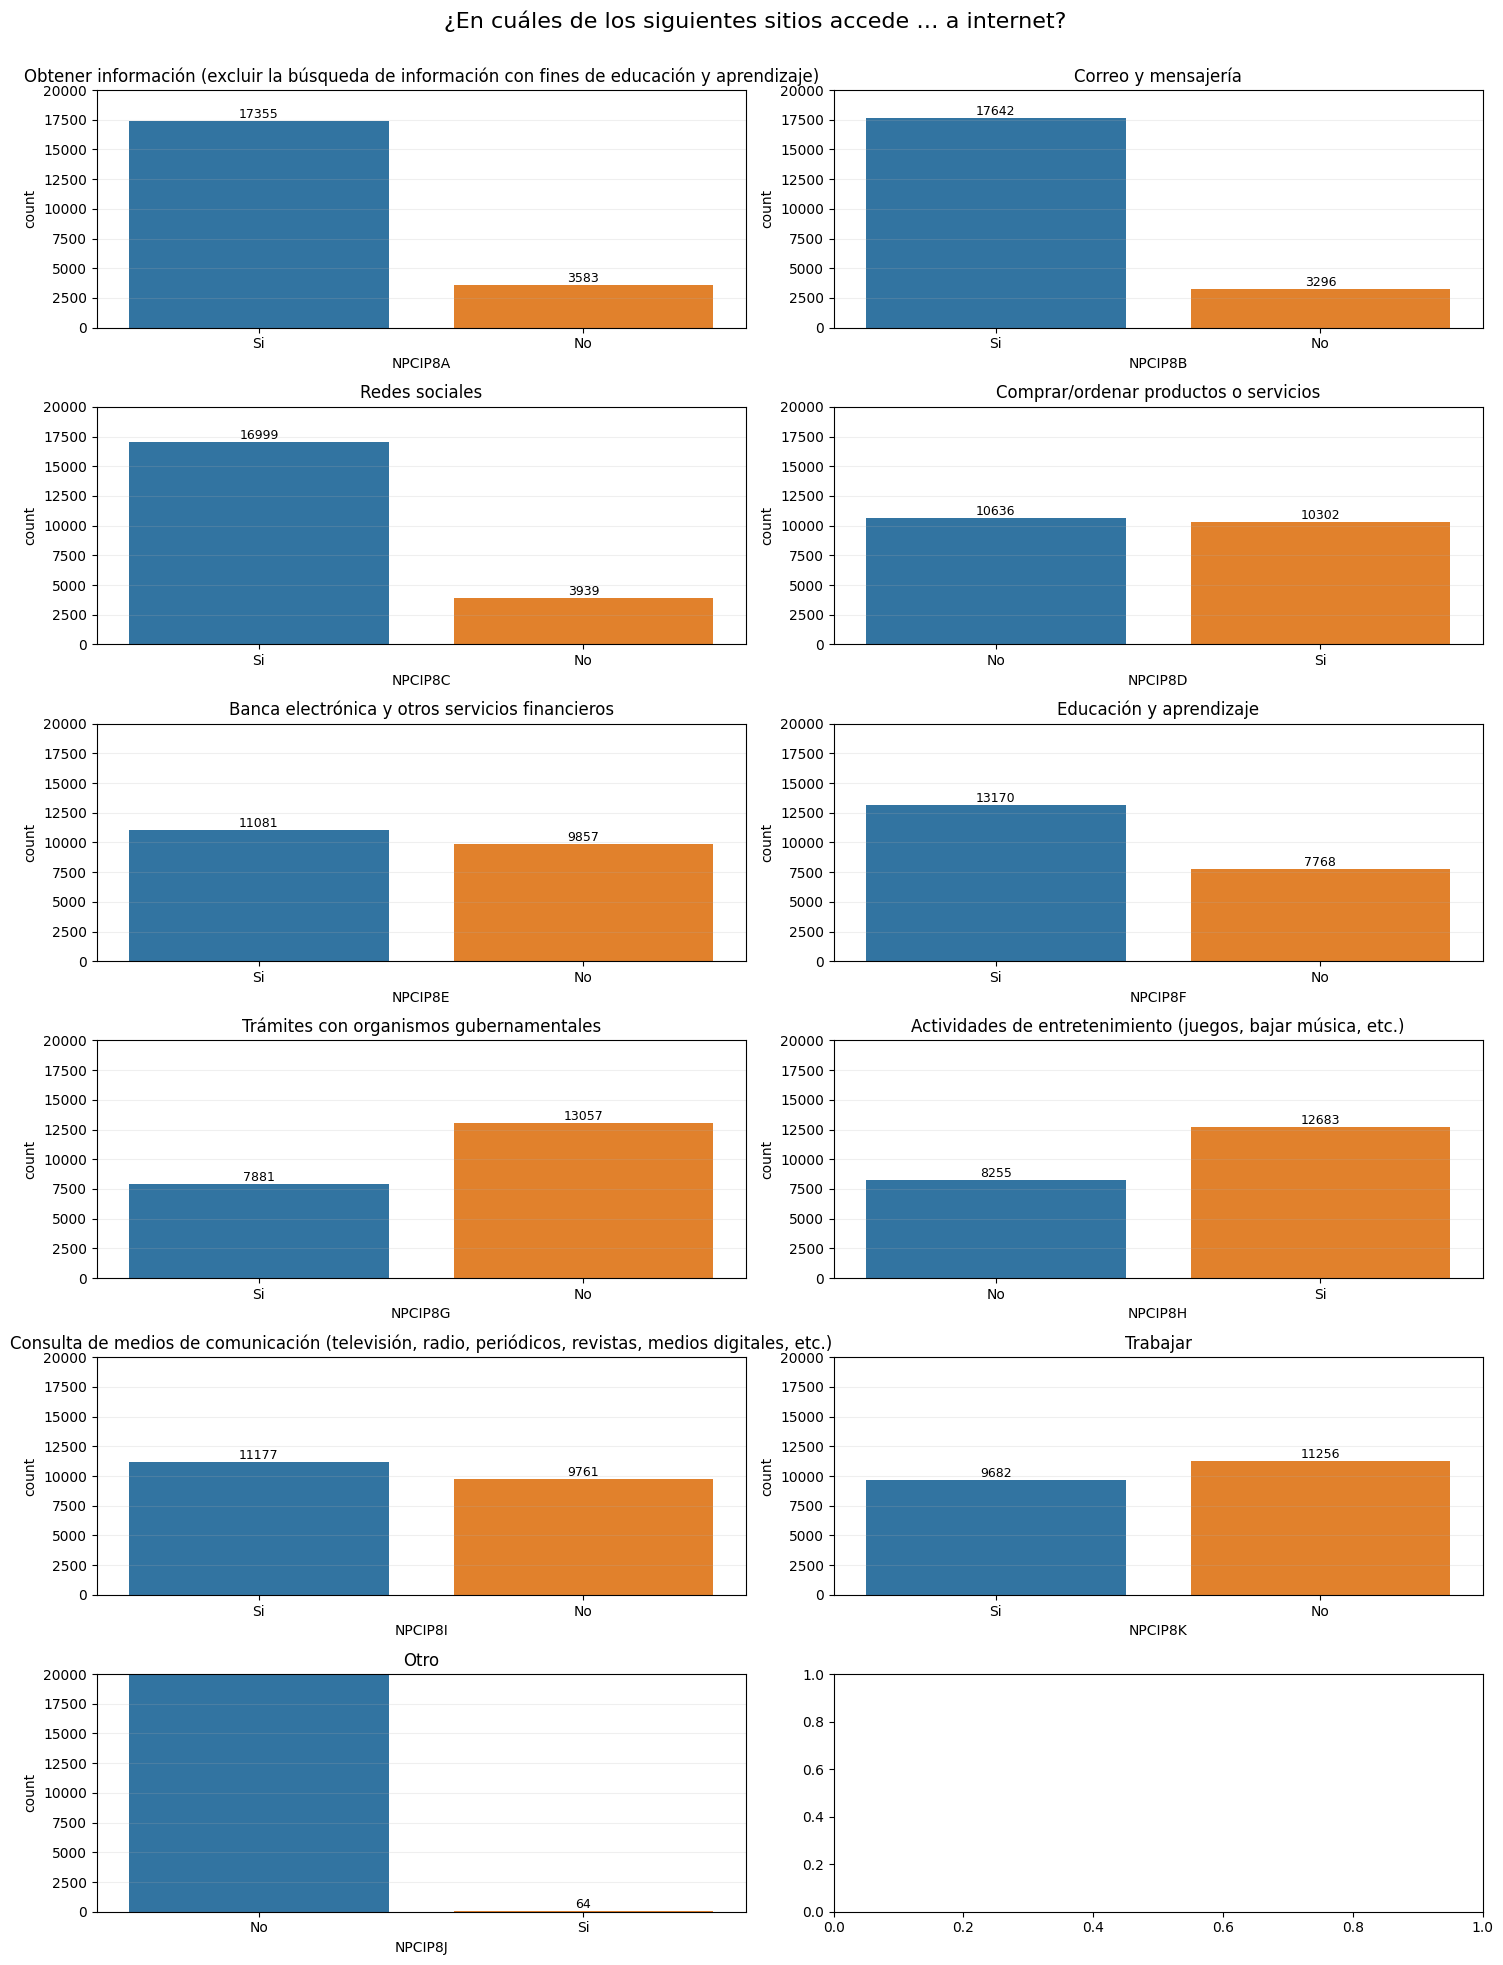

In [39]:
fig, axes = plt.subplots(6,2, figsize = (15,20), squeeze=False)
axli = axes.flatten()
fig.subplots_adjust(top=0.9)
fig.suptitle('¿En cuáles de los siguientes sitios accede … a internet? ', fontsize= 16)
for ax,cols,names in zip(axli,disc,list_disc):
    sns.countplot(x = cols, data = data, ax = ax)
    ax.grid(alpha = 0.2, axis = 'y')
    ax.set_title(f'{names}')
    #ax.set_xticks([0,1],['No','Si'])
    ax.set_ylim(0,20000)
    ax.margins(y=0.1) # make room for the labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.0f', fontsize=9)
plt.tight_layout() 
plt.subplots_adjust(top=0.94)
plt.show()

## NPCIP8DE
### 8De. ¿Cuál es la razón principal para no usar el internet en compras ni en servicios de banca electrónica?
1. Falta de seguridad
2. No sabe cómo hacerlo
3. No tiene cuentas bancarias, ni tarjetas débito o crédito
4. Otra razón

**Datos: 8835**


In [40]:
data['NPCIP8DE'].count()

8835

In [41]:
data['NPCIP8DE'].value_counts()

3.0    3735
Si     2903
No     1333
4.0     864
Name: NPCIP8DE, dtype: int64

In [43]:
data['NPCIP8DE'] = data['NPCIP8DE'].replace([1,2,3,4],['Falta de seguridad',
'No sabe cómo hacerlo',
'No tiene cuentas bancarias, ni tarjetas débito o crédito',
'Otra razón'])

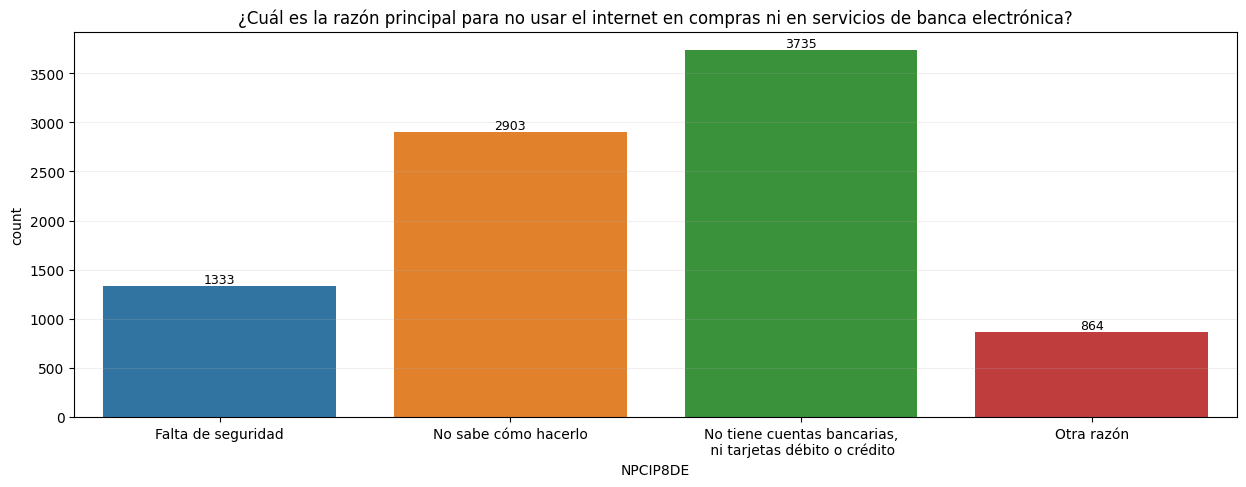

In [44]:
fig, ax = plt.subplots(figsize=(15, 5))
g = sns.countplot(ax=ax, data = data, x ='NPCIP8DE')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('¿Cuál es la razón principal para no usar el internet en compras ni en servicios de banca electrónica?')
ax.set_xticklabels(['Falta de seguridad',
'No sabe cómo hacerlo',
'No tiene cuentas bancarias,\n ni tarjetas débito o crédito',
'Otra razón'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()


## NPCIP11{A-D}
### 9. Cuando se le presentan dudas o inconvenientes con el uso de dispositivos electrónicos (computador, tableta, reproductor) o internet, ¿a quién recurre?      
1. Soporte técnico del proveedor
2. Familiares y amigos/as
3. Compañeros(as) de trabajo o estudio
4. No recurre a nadie


In [44]:
disc = [i for i in data.columns if 'NPCIP11' in str(i)]
#disc.remove('NPCIP2DA')
print(disc)

['NPCIP11A', 'NPCIP11B', 'NPCIP11C', 'NPCIP11D']


In [45]:
for i in disc:
    print(i, data[i].count())

NPCIP11A 12921
NPCIP11B 9902
NPCIP11C 964
NPCIP11D 1716


In [46]:
for i in disc:
    data = data.replace({i:2},0)

In [47]:
for i in disc:
    print(data[i].value_counts())

1.0    12921
Name: NPCIP11A, dtype: int64
1.0    9902
Name: NPCIP11B, dtype: int64
1.0    964
Name: NPCIP11C, dtype: int64
1.0    1716
Name: NPCIP11D, dtype: int64


## NPCIP12	
### 10. ¿ ...tiene teléfono celular?
1. Sí
2. No

**Datos: 23515**

In [49]:
data['NPCIP12'].count()

23515

In [50]:
data['NPCIP12'].value_counts()

1.0    21084
2.0     2431
Name: NPCIP12, dtype: int64

In [51]:
data = data.replace({'NPCIP12':2},0)

In [48]:
data['NPCIP12'] = data['NPCIP12'].replace([0,1], ["No","Si"])

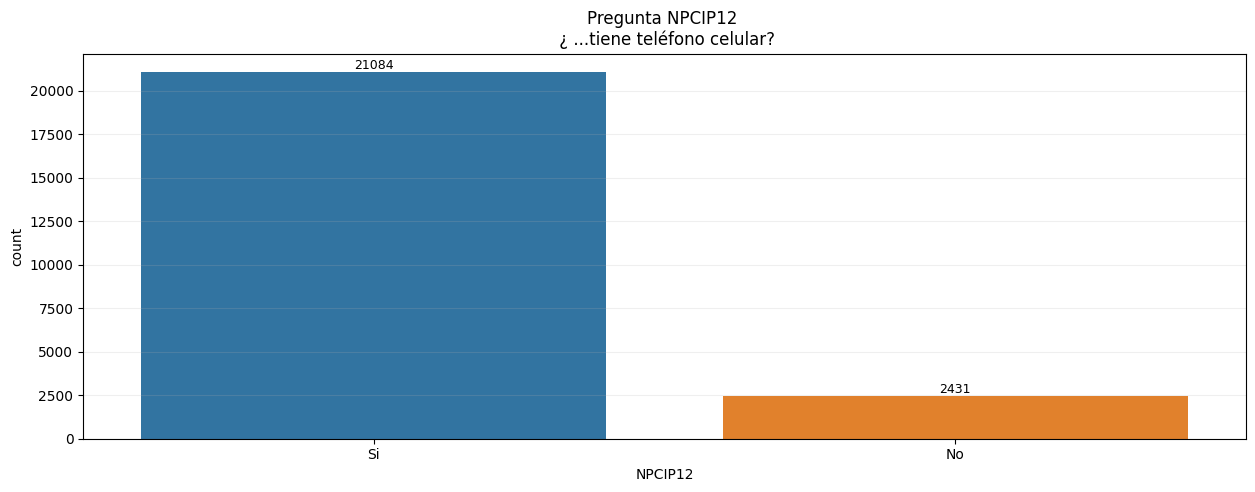

In [49]:
fig, ax = plt.subplots(figsize=(15, 5))
g = sns.countplot(ax=ax, data = data, x ='NPCIP12')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('Pregunta NPCIP12 \n ¿ ...tiene teléfono celular?')
#ax.set_xticklabels(['No','Si'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NPCIP12A	
### Teléfono celular convencional	
1. Sí
2. No

**Datos: 21804**


In [50]:
data['NPCIP12A'].count()

21084

In [51]:
data['NPCIP12A'].value_counts()

0.0    18133
1.0     2951
Name: NPCIP12A, dtype: int64

In [56]:
data = data.replace({'NPCIP12A':2},0)

In [52]:
data['NPCIP12A'] = data['NPCIP12A'].replace([0,1],["No","Si"])

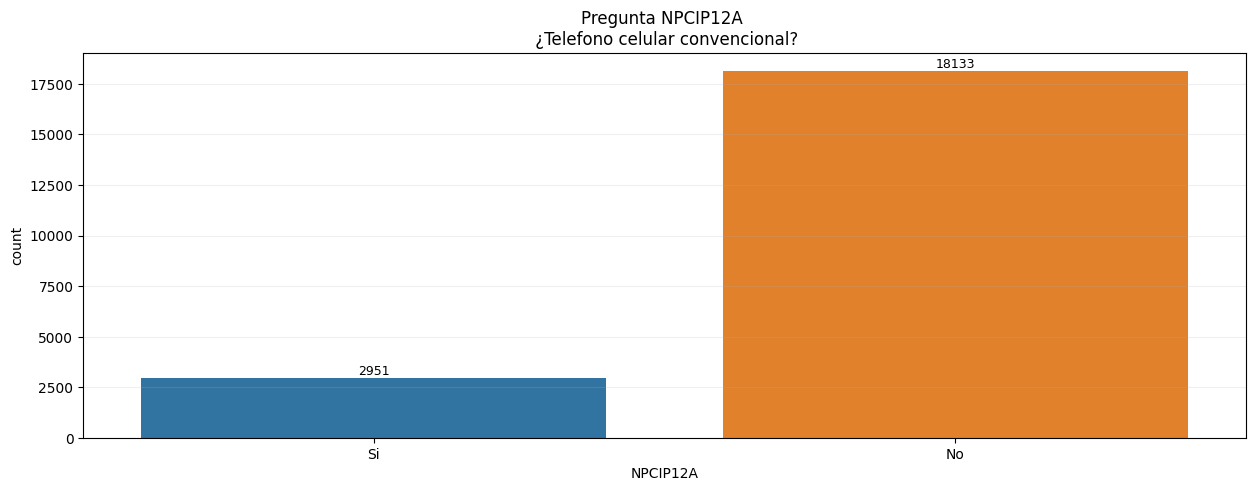

In [53]:
fig, ax = plt.subplots(figsize=(15, 5))
g = sns.countplot(ax=ax, data = data, x ='NPCIP12A')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('Pregunta NPCIP12A \n ¿Telefono celular convencional?')
#ax.set_xticklabels(['No','Si'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NPCIP12B
###	Teléfono celular inteligente (smartphone)
1. Sí
2. No

**Datos: 21804**

In [54]:
data['NPCIP12B'].count()

21084

In [55]:
data['NPCIP12B'].value_counts()

1.0    19578
0.0     1506
Name: NPCIP12B, dtype: int64

In [62]:
data = data.replace({'NPCIP12B':2},0)

In [56]:
data['NPCIP12B'] = data['NPCIP12B'].replace([0,1], ["No","Si"])

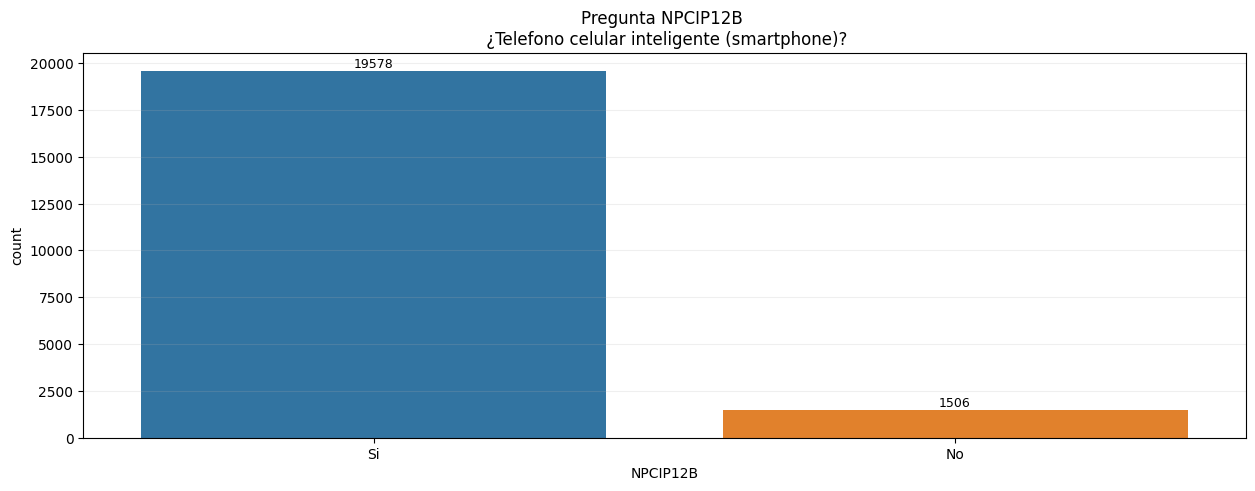

In [57]:
fig, ax = plt.subplots(figsize=(15, 5))
g = sns.countplot(ax=ax, data = data, x ='NPCIP12B')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('Pregunta NPCIP12B \n ¿Telefono celular inteligente (smartphone)?')
#ax.set_xticklabels(['No','Si'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NPCIP13A1
###	11. El MES PASADO, ¿Cuánto pagó … por el servicio de telefonía celular (Incluya voz y datos)? Líneas prepago	
1. Sí

**Datos: 8268**

In [64]:
data['NPCIP13A1'].count()

8268

In [65]:
data['NPCIP13A1'].value_counts()

1.0    8268
Name: NPCIP13A1, dtype: int64

In [66]:
data = data.replace({'NPCIP13A1':2},0)

## NPCIP13B1
###	11. El MES PASADO, ¿Cuánto pagó … por el servicio de telefonía celular (Incluya voz y datos)? Líneas pospago 
1. Sí

**Datos: 12865**

In [68]:
data['NPCIP13B1'].count()

12865

In [69]:
data['NPCIP13B1'].value_counts()

1.0    12865
Name: NPCIP13B1, dtype: int64

In [70]:
data = data.replace({'NPCIP13B1':2},0)

## NPCIP13A
###	11. El MES PASADO, ¿Cuánto pago ... por el servicio de telefonía celular (Incluya voz y datos)? 1. Líneas prepago - Valor MENSUAL	

**Datos: 8268**

In [72]:
data['NPCIP13A'].count()

8268

In [73]:
data['NPCIP13A'].describe().apply("{0:.2f}".format)

count      8268.00
mean      13043.04
std       15160.17
min           0.00
25%           0.00
50%       10000.00
75%       20000.00
max      100000.00
Name: NPCIP13A, dtype: object

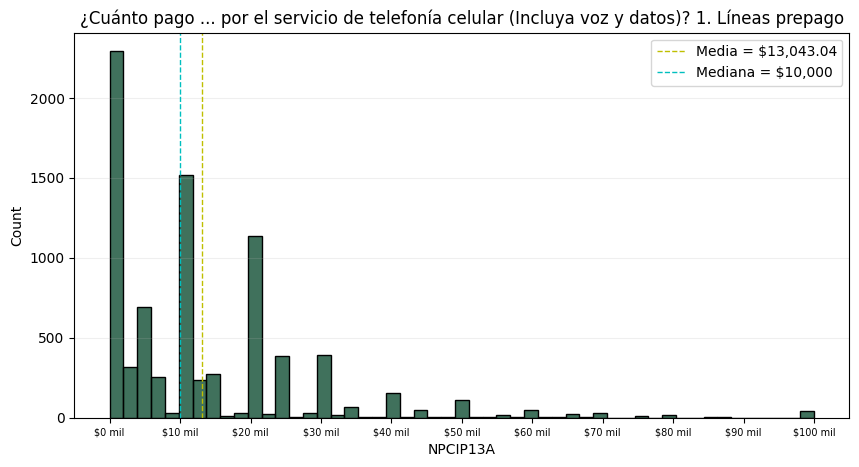

In [83]:
plt.figure(figsize=(10,5))
sns.histplot(data = data, x = 'NPCIP13A', color = '#004225', fill = True)
plt.title('¿Cuánto pago ... por el servicio de telefonía celular (Incluya voz y datos)? 1. Líneas prepago')
plt.grid(alpha = 0.2, axis = 'y')
plt.axvline(data['NPCIP13A'].mean(), color='y', linestyle='dashed', linewidth=1, label = f'Media = ${data["NPCIP13A"].mean():,.2f}')
plt.axvline(data['NPCIP13A'].median(), color='c', linestyle='dashed', linewidth=1, label = f'Mediana = ${data["NPCIP13A"].median():,.0f}')
plt.xticks(range(0,110000,10000),[f'${(i / 1000):.0f} mil' for i in range(0,110000,10000)], fontsize=7)
plt.legend()
plt.show()

## NPCIP13B
###	11. El MES PASADO, ¿Cuánto pago ... por el servicio de telefonía celular (Incluya voz y datos)? 2. Líneas pospago Valor MENSUAL

**Datos: 12865**

In [84]:
data['NPCIP13B'].count()

12865

In [85]:
data['NPCIP13B'].describe().apply("{0:.2f}".format)

count      12865.00
mean       61163.93
std        63403.59
min            0.00
25%        40000.00
50%        55000.00
75%        70000.00
max      1000000.00
Name: NPCIP13B, dtype: object

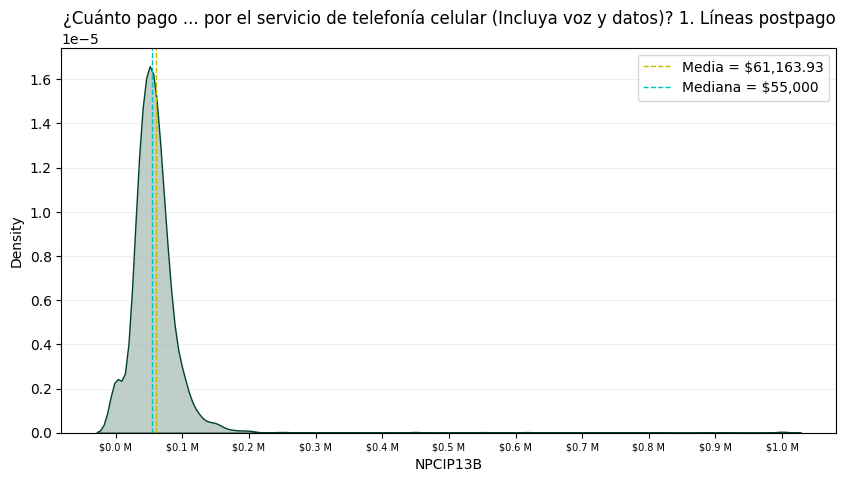

In [93]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = data, x = 'NPCIP13B', color = '#004225', fill = True)
plt.title('¿Cuánto pago ... por el servicio de telefonía celular (Incluya voz y datos)? 1. Líneas postpago')
plt.grid(alpha = 0.2, axis = 'y')
plt.axvline(data['NPCIP13B'].mean(), color='y', linestyle='dashed', linewidth=1, label = f'Media = ${data["NPCIP13B"].mean():,.2f}')
plt.axvline(data['NPCIP13B'].median(), color='c', linestyle='dashed', linewidth=1, label = f'Mediana = ${data["NPCIP13B"].median():,.0f}')
plt.xticks(range(0,1100000,100000),[f'${(i / 1000000):.1f} M' for i in range(0,1100000,100000)], fontsize=7)
plt.legend()
plt.show()

## NPCIP14
###	12. A pesar de no tener teléfono celular, ... accede al servicio de telefonía móvil celular:
1. Sí
2. No

**Datos: 2431**


In [94]:
data['NPCIP14'].count()

2431

In [95]:
data['NPCIP14'].value_counts()

2.0    1223
1.0    1208
Name: NPCIP14, dtype: int64

In [96]:
data = data.replace({'NPCIP14':2},0)

In [58]:
data['NPCIP14'] = data['NPCIP14'].replace([0,1], ["No","Si"])

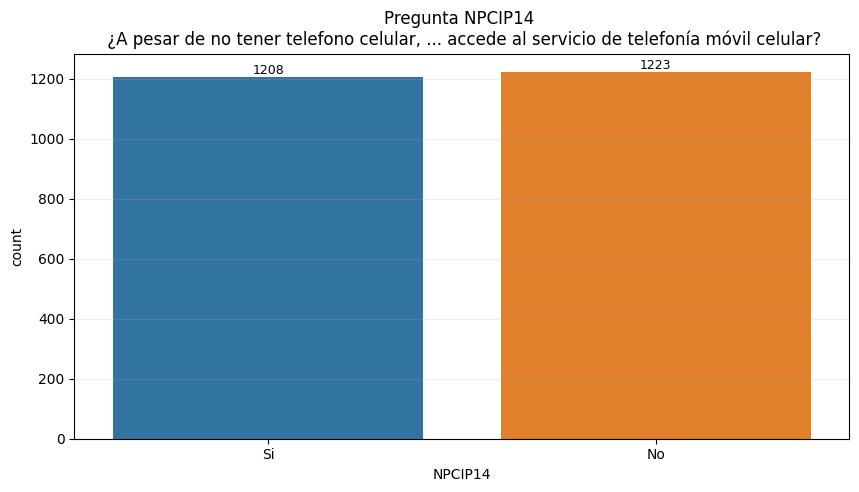

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.countplot(ax=ax, data = data, x ='NPCIP14')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('Pregunta NPCIP14 \n ¿A pesar de no tener telefono celular, ... accede al servicio de telefonía móvil celular?')
#ax.set_xticklabels(['No','Si'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NPCIP14{A-B}
###	Accede por:                                                                                                                          
1. Servicio de venta de minutos                                                                                                       
2. Prestado ocasionalmente por otra persona

**Datos: **

In [60]:
disc = [i for i in data.columns if 'NPCIP14' in str(i)]
disc.remove('NPCIP14')
print(disc)

['NPCIP14A', 'NPCIP14B']


In [61]:
for i in disc:
    print(i, data[i].count())

NPCIP14A 54
NPCIP14B 1189


In [62]:
for i in disc:
    print(i, data[i].value_counts())

NPCIP14A 1.0    54
Name: NPCIP14A, dtype: int64
NPCIP14B 1.0    1189
Name: NPCIP14B, dtype: int64


In [63]:
for i in disc:
    data = data.replace({i:2},0)

## NPCIP16{A-J}	
### 13. Para comunicar o informar a su familia, amigos/as o comunidad acerca de algo… ¿cuáles medios utiliza usualmente:
1. Conversación  personal (cara a cara)
2. Carta
3. Teléfono
4. Mensajería instantánea (Whatsapp, mensajes de texto, chats)
5. Blog en internet
6. Correo electrónico
7. Facebook
8. Twitter
9. Instagram
10. Cartelera informativa

**Datos: 22213**


In [64]:
disc = [i for i in data.columns if 'NPCIP16' in str(i)]
#disc.remove('NPCIP2DA')
print(disc)

['NPCIP16A', 'NPCIP16B', 'NPCIP16C', 'NPCIP16D', 'NPCIP16E', 'NPCIP16F', 'NPCIP16G', 'NPCIP16H', 'NPCIP16I', 'NPCIP16J']


In [103]:
for i in disc:
    print(i, data[i].count())

NPCIP16A 22213
NPCIP16B 22213
NPCIP16C 22213
NPCIP16D 22213
NPCIP16E 22213
NPCIP16F 22213
NPCIP16G 22213
NPCIP16H 22213
NPCIP16I 22213
NPCIP16J 22213


In [65]:
for i in disc:
    data[i] = data[i].replace([0,1],["No","Si"])

In [66]:
list_disc= ['Conversación  personal (cara a cara)',
'Carta',
'Teléfono',
'Mensajería instantánea (Whatsapp, mensajes de texto, chats)',
'Blog en internet',
'Correo electrónico',
'Facebook',
'Twitter',
'Instagram',
'Cartelera informativa']

In [107]:
for i in disc:
    data = data.replace({i:2},0)

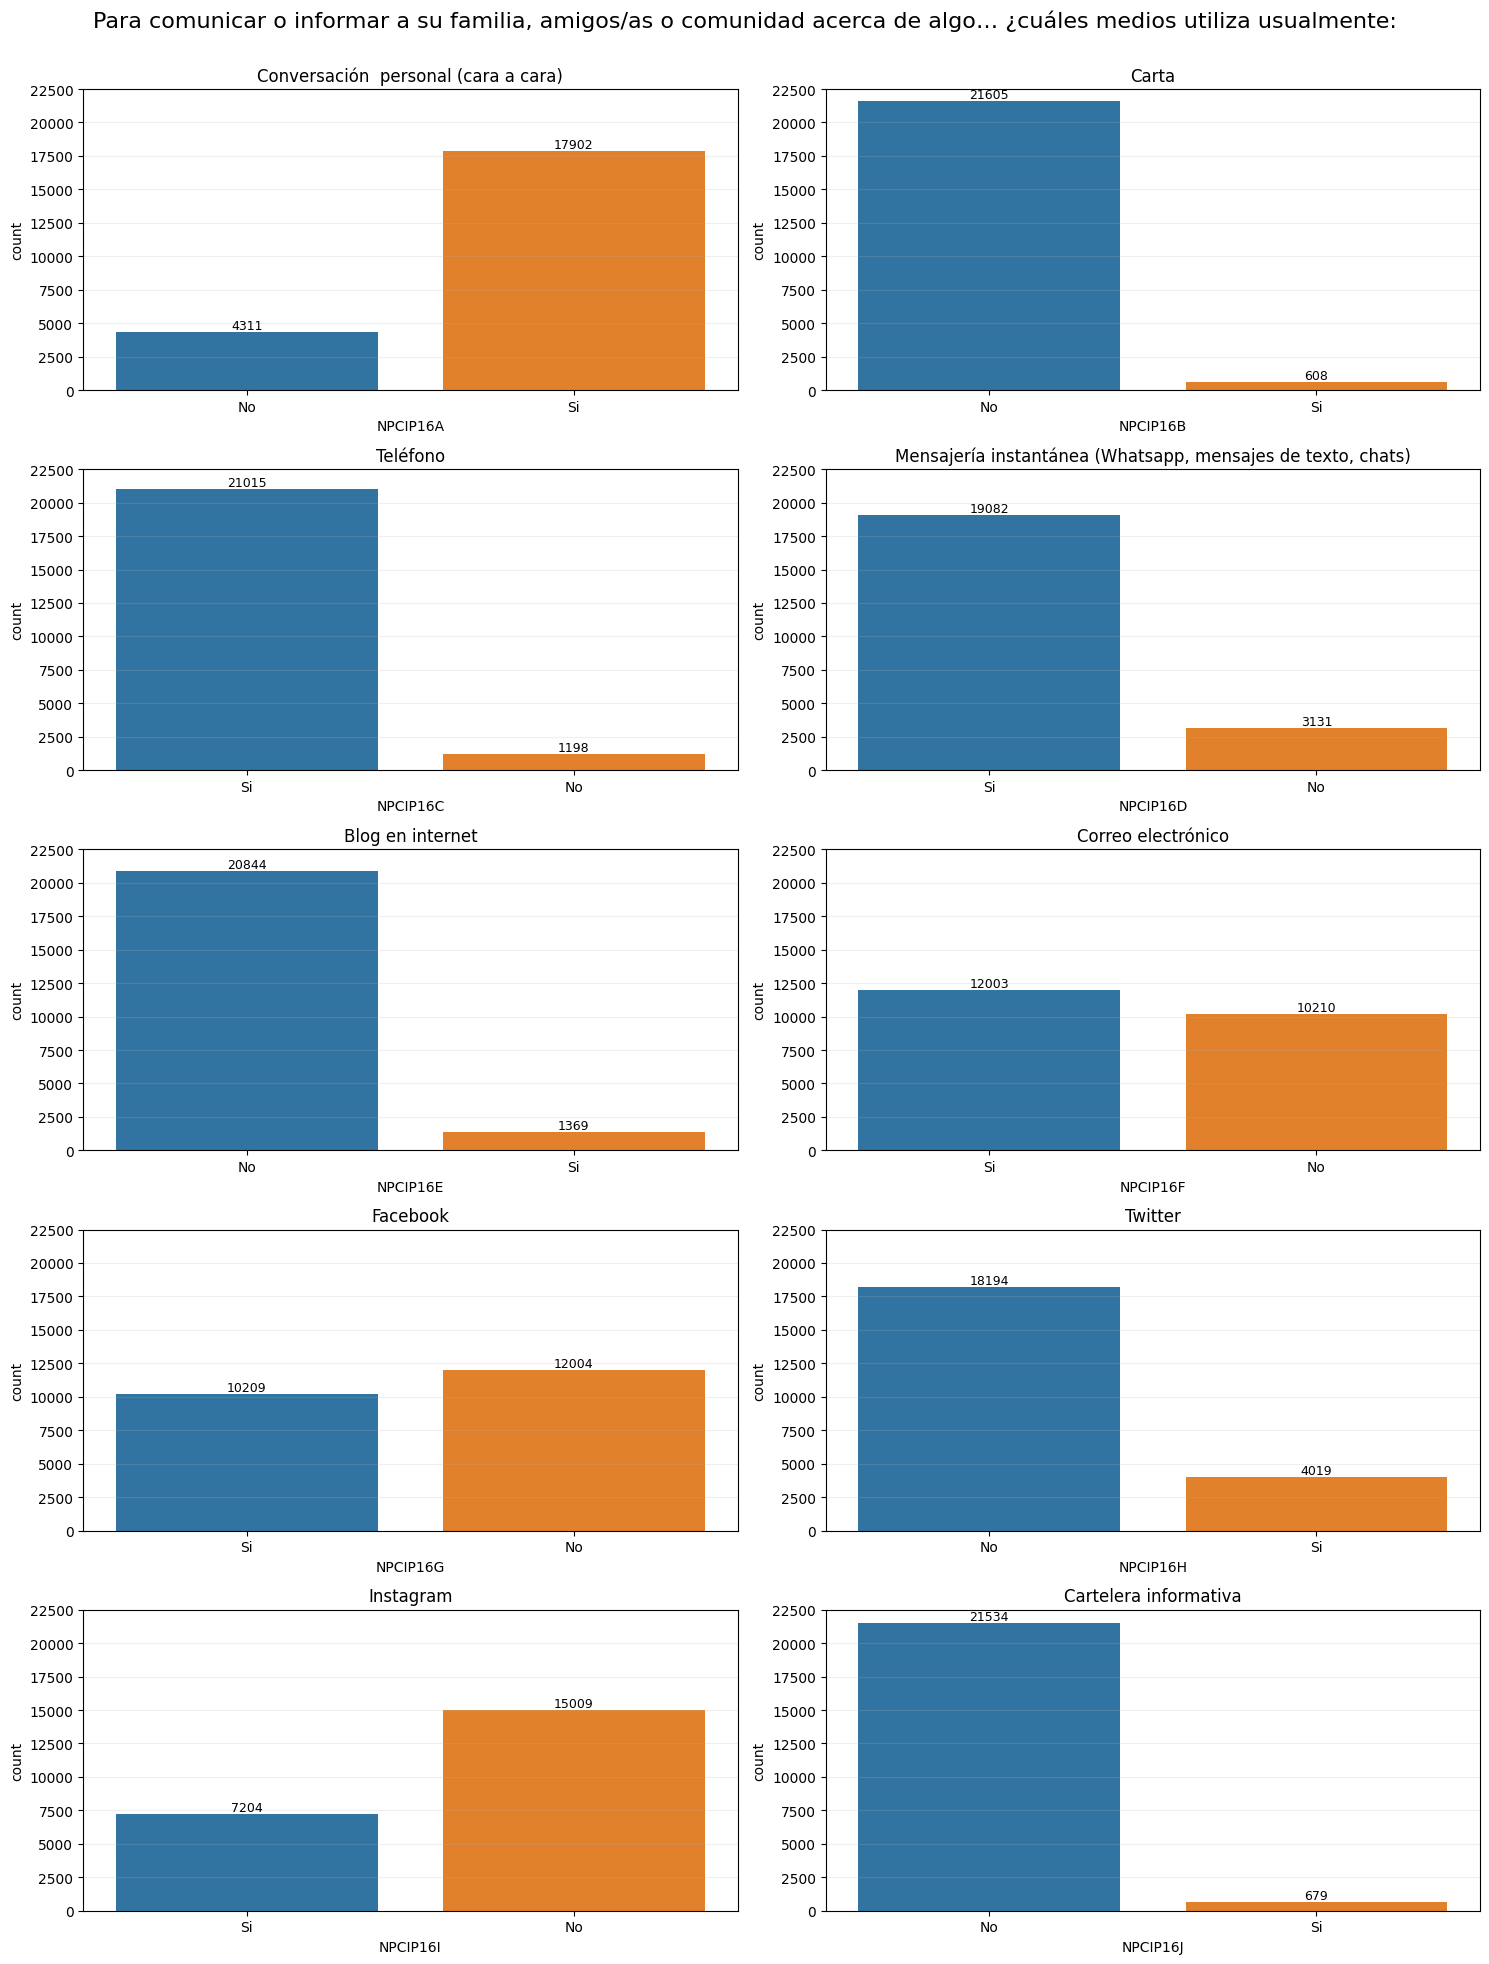

In [68]:
fig, axes = plt.subplots(5,2, figsize = (15,20), squeeze=False)
axli = axes.flatten()
fig.subplots_adjust(top=0.9)
fig.suptitle('Para comunicar o informar a su familia, amigos/as o comunidad acerca de algo… ¿cuáles medios utiliza usualmente:', fontsize= 16)
for ax,cols,names in zip(axli,disc,list_disc):
    sns.countplot(x = cols, data = data, ax = ax)
    ax.grid(alpha = 0.2, axis = 'y')
    ax.set_title(f'{names}')
    #ax.set_xticks([0,1],['No','Si'])
    ax.set_ylim(0,22500)
    ax.margins(y=0.1) # make room for the labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.0f', fontsize=9)
plt.tight_layout() 
plt.subplots_adjust(top=0.94)
plt.show()

## NPCIP17{A-M}	"14. Para obtener información de su interés ...¿cuales medios de comunicación utiliza usualmente?
1. Expresión verbal
2. Carta
3. Teléfono
4. Mensajería instantánea
5. Internet
6. Correo electrónico
7. Facebook
9. Twitter
9. Televisión
10. Radio
11. Periódicos y revistas
12. Cartelera informativa
13. De ningún medio obtiene información

**Datos: **

In [69]:
disc = [i for i in data.columns if 'NPCIP17' in str(i)]
#disc.remove('NPCIP2DA')
print(disc)

['NPCIP17A', 'NPCIP17B', 'NPCIP17C', 'NPCIP17D', 'NPCIP17E', 'NPCIP17F', 'NPCIP17G', 'NPCIP17H', 'NPCIP17I', 'NPCIP17J', 'NPCIP17K', 'NPCIP17L', 'NPCIP17M']


In [70]:
for i in disc:
    print(i, data[i].count())

NPCIP17A 12156
NPCIP17B 849
NPCIP17C 14651
NPCIP17D 11419
NPCIP17E 14486
NPCIP17F 7798
NPCIP17G 6276
NPCIP17H 2381
NPCIP17I 10394
NPCIP17J 5331
NPCIP17K 4008
NPCIP17L 341
NPCIP17M 205


In [71]:
for i in disc:
    print(i, data[i].value_counts())

NPCIP17A 1.0    12156
Name: NPCIP17A, dtype: int64
NPCIP17B 1.0    849
Name: NPCIP17B, dtype: int64
NPCIP17C 1.0    14651
Name: NPCIP17C, dtype: int64
NPCIP17D 1.0    11419
Name: NPCIP17D, dtype: int64
NPCIP17E 1.0    14486
Name: NPCIP17E, dtype: int64
NPCIP17F 1.0    7798
Name: NPCIP17F, dtype: int64
NPCIP17G 1.0    6276
Name: NPCIP17G, dtype: int64
NPCIP17H 1.0    2381
Name: NPCIP17H, dtype: int64
NPCIP17I 1.0    10394
Name: NPCIP17I, dtype: int64
NPCIP17J 1.0    5331
Name: NPCIP17J, dtype: int64
NPCIP17K 1.0    4008
Name: NPCIP17K, dtype: int64
NPCIP17L 1.0    341
Name: NPCIP17L, dtype: int64
NPCIP17M 1.0    205
Name: NPCIP17M, dtype: int64


In [72]:
for i in disc:
    data[i] = data[i].replace([0,1],["No","Si"])

In [73]:
data.to_excel('Encuesta_Multiproposito_Suba.xlsx', index = False)